## Wrangling Twitter Data for WeRateDogs - Data Wrangling
###### By Kaspar Lee

In [1]:
import json
import requests
import numpy as np
import pandas as pd

### Gathering

#### Scrape Twitter Data

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### Download Image Predictions

In [2]:
# Download and save image predictions
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
open('image_predictions.tsv', 'wb').write(r.content)

335079

#### Create and Check DataFrames

In [3]:
# Create dataframes
df1 = pd.read_csv('twitter_archive_enhanced.csv')
df2 = pd.read_json('tweet_json.txt', lines=True)
image_preds = pd.read_csv('image_predictions.tsv', sep='\t')

### Assessing

#### Twitter Archive Enhanced (`df1`)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df1.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Tito         1
Monty        1
Miley        1
Jed          1
Biden        1
Name: name, Length: 957, dtype: int64

#### Tweets (`df2`)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [9]:
df2.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### Image Predictions (`image_preds`)

In [10]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Quality Issues:

- 181 entries are retweets, and multiple unnecessary columns exist just for retweets
- IDs are stored as integers or floats, rather than being stored as strings. They should not be stored as number types as they will should never be used in any sort of mathematical calculation.
- Some tweets have no images (number of non-null `expanded_urls` is less than total number of entries)
- Timestamps are stored as strings instead of more appropriate *datatime64* objects
- Value in `source` column stored as HTML code rather than actual link
- Rating numerator max value is 1776 (incorrectly extracted)
- Rating denominator min value is 0 and max value is 170 (incorrectly extracted)
- Name is incorrectly "a" for 55 entries, and "None" for 745 entries, should be a null value
- Dog stage columns have "None" for empty values, a non-null value, for what should be a null value, such as `NaN`
- `contributors`, `coordinates` and `geo` columns empty

#### Tidiness Issues:

- `df1` dog stage variable (i.e. doggo, floofer, pupper and puppo) should all be together in a single column, as they are all values for one variable, the type of dog.
- Duplicate columns across dataframes

### Cleaning

In [12]:
# Create a copy of each dataframe
df1_clean = df1.copy()
df2_clean = df2.copy()
image_preds_clean = image_preds.copy()

In [13]:
# Merge into master dataframe
columns = df2_clean.columns.difference(df1_clean.columns)
df_master = pd.merge(df1_clean, df2_clean[columns], how='left', left_on=['tweet_id'], right_on=['id'])
df_master = pd.merge(df_master, image_preds_clean, how='left', on=['tweet_id'])

In [14]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   int64              
 1   in_reply_to_status_id          78 non-null     float64            
 2   in_reply_to_user_id            78 non-null     float64            
 3   timestamp                      2356 non-null   object             
 4   source                         2356 non-null   object             
 5   text                           2356 non-null   object             
 6   retweeted_status_id            181 non-null    float64            
 7   retweeted_status_user_id       181 non-null    float64            
 8   retweeted_status_timestamp     181 non-null    object             
 9   expanded_urls                  2297 non-null   object             
 10  rating_numerator        

---

#### 181 entries are retweets, and multiple unnecessary columns exist just for retweets

**Define**: Delete retweets, replies, then remove unnecessary columns.

**Code**:

In [15]:
# Only keep tweets that are not retweets
df_master = df_master[df_master['retweeted_status'].isnull()]
df_master = df_master[df_master['retweeted_status_id'].isnull()]

df_master.drop(columns=['retweeted_status', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str'], inplace=True)

**Test**:

In [16]:
pd.set_option('display.max_columns', None)
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated,user,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN,2017-08-01 16:23:56+00:00,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467.0,False,This is Phineas. He's a mystical boy. Only eve...,NaN,8.924206e+17,8.924206e+17,False,en,None,0.0,0.0,8853.0,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN,NaN,2017-08-01 00:17:27+00:00,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819.0,False,This is Tilly. She's just checking pup on you....,NaN,8.921774e+17,8.921774e+17,False,en,None,0.0,0.0,6514.0,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN,NaN,2017-07-31 00:18:03+00:00,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461.0,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,8.918152e+17,8.918152e+17,False,en,None,0.0,0.0,4328.0,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN,NaN,2017-07-30 15:58:51+00:00,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908.0,False,This is Darla. She commenced a snooze mid meal...,NaN,8.916896e+17,8.916896e+17,False,en,None,0.0,0.0,8964.0,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN,NaN,2017-07-29 16:00:24+00:00,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048.0,False,This is Franklin. He would like you to stop ca...,NaN,8.913276e+17,8.913276e+17,False,en,None,0.0,0.0,9774.0,False,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


---

#### IDs are stored as integers or floats, rather than being stored as strings. They should not be stored as number types as they will should never be used in any sort of mathematical calculation.

**Define**: Convert ID column to string.

**Code**:

In [17]:
df_master['tweet_id'] = df_master['tweet_id'].astype('str')
df_master.drop(columns=['id', 'id_str'], inplace=True) # Drop duplicate ID columns

**Test**:

In [18]:
df_master.dtypes # tweet_id should be "object" (string)

tweet_id                                      object
timestamp                                     object
source                                        object
text                                          object
expanded_urls                                 object
rating_numerator                               int64
rating_denominator                             int64
name                                          object
doggo                                         object
floofer                                       object
pupper                                        object
puppo                                         object
contributors                                 float64
coordinates                                  float64
created_at                       datetime64[ns, UTC]
display_text_range                            object
entities                                      object
extended_entities                             object
favorite_count                               f

---

#### Some tweets have no images (number of non-null `expanded_urls` is less than total number of entries)

**Define**: Drop entries with null expanded_urls.

**Code**:

In [19]:
df_master.dropna(subset=['expanded_urls'], inplace=True)

**Test**:

In [20]:
df_master.info() ## Number of non-null expanded_urls should match number of entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2117 non-null   object             
 1   timestamp                      2117 non-null   object             
 2   source                         2117 non-null   object             
 3   text                           2117 non-null   object             
 4   expanded_urls                  2117 non-null   object             
 5   rating_numerator               2117 non-null   int64              
 6   rating_denominator             2117 non-null   int64              
 7   name                           2117 non-null   object             
 8   doggo                          2117 non-null   object             
 9   floofer                        2117 non-null   object             
 10  pupper                  

---

#### Timestamps are stored as strings instead of more appropriate *datatime64* objects

**Define**: Convert `timestamp` column to *datetime64* datatype.

**Code**:

In [21]:
df_master['timestamp'] = pd.to_datetime(df_master['timestamp'])

In [22]:
df_master.dtypes # timestamp should be "datetime64"

tweet_id                                      object
timestamp                        datetime64[ns, UTC]
source                                        object
text                                          object
expanded_urls                                 object
rating_numerator                               int64
rating_denominator                             int64
name                                          object
doggo                                         object
floofer                                       object
pupper                                        object
puppo                                         object
contributors                                 float64
coordinates                                  float64
created_at                       datetime64[ns, UTC]
display_text_range                            object
entities                                      object
extended_entities                             object
favorite_count                               f

---

#### Value in `source` column stored as HTML code rather than actual link

**Define**: Use regular expressions to extract and save only the URLs.

**Code**:

In [23]:
df_master['source'] = df_master['source'].str.extract(r'href="([^""]+)"')

**Test**:

In [24]:
df_master['source'] # Should be regular URLs with no HTML code around them

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: source, Length: 2117, dtype: object

---

#### Rating numerator max value is 1776 (incorrectly extracted)

**Define**: Remove numerators higher than 100.

**Code**:

In [25]:
df_master = df_master.query('rating_numerator <= 100')

**Test**:

In [26]:
df_master.describe()['rating_numerator'] # Max should be less than or equal to 100

count    2110.000000
mean       10.877725
std         4.615847
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        99.000000
Name: rating_numerator, dtype: float64

---

#### Rating denominator min value is 0 and max value is 170 (incorrectly extracted)

**Define**: Set all denominators to 10.

**Code**:

In [27]:
denominators = np.repeat(10, df_master.shape[0]).tolist()
df_master = df_master.assign(rating_denominator=denominators)

**Test**:

In [28]:
df_master['rating_denominator'].value_counts() ## Should only be value of 10

10    2110
Name: rating_denominator, dtype: int64

---

#### Name is incorrectly "a" for 55 entries, and "None" for 745 entries, should be a null value

**Define**: Find all names of "None" or "a" and replace with null value.

**Code**:

In [29]:
df_master['name'].value_counts()

None         617
a             55
Lucy          11
Charlie       11
Cooper        10
            ... 
life           1
Grizzie        1
Margo          1
Alexander      1
Biden          1
Name: name, Length: 955, dtype: int64

In [30]:
df_master['name'] = df_master['name'].replace(['None', 'a'], np.NaN)

**Test**:

In [31]:
df_master['name'].value_counts() # "None" and "a" should not exists in list

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
             ..
Sprinkles     1
life          1
Grizzie       1
Margo         1
Biden         1
Name: name, Length: 953, dtype: int64

---

#### Dog stage columns have "None" for empty values, a non-null value, for what should be a null value, such as `NaN`

**Define**: Replace all values of "None" with `NaN` in columns *doggo*, *floofer*, *pupper* and *puppo*.

**Code**:

In [32]:
df_master['doggo'] = df_master['doggo'].replace('None', np.NaN)
df_master['floofer'] = df_master['floofer'].replace('None', np.NaN)
df_master['pupper'] = df_master['pupper'].replace('None', np.NaN)
df_master['puppo'] = df_master['puppo'].replace('None', np.NaN)

**Test**:

In [33]:
# Those 4 columns should have relatively few non-null counts
# Rather than same as the number of entries, as before
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2355
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2110 non-null   object             
 1   timestamp                      2110 non-null   datetime64[ns, UTC]
 2   source                         2110 non-null   object             
 3   text                           2110 non-null   object             
 4   expanded_urls                  2110 non-null   object             
 5   rating_numerator               2110 non-null   int64              
 6   rating_denominator             2110 non-null   int64              
 7   name                           1438 non-null   object             
 8   doggo                          84 non-null     object             
 9   floofer                        10 non-null     object             
 10  pupper                  

---

#### `contributors`, `coordinates` and `geo` columns empty

**Define**: Remove `contributors`, `coordinates` and `geo` columns.

**Code**:

In [34]:
df_master.drop(columns=['contributors', 'coordinates', 'geo'], inplace=True)

**Test**:

In [35]:
df_master.info() # Columns should no longer exist

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2355
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2110 non-null   object             
 1   timestamp                      2110 non-null   datetime64[ns, UTC]
 2   source                         2110 non-null   object             
 3   text                           2110 non-null   object             
 4   expanded_urls                  2110 non-null   object             
 5   rating_numerator               2110 non-null   int64              
 6   rating_denominator             2110 non-null   int64              
 7   name                           1438 non-null   object             
 8   doggo                          84 non-null     object             
 9   floofer                        10 non-null     object             
 10  pupper                  

---

#### `df1` dog stage variable (i.e. doggo, floofer, pupper and puppo) should all be together in a single column, as they are all values for one variable, the type of dog.

**Define**: Combine all columns into single column, then drop old unnecessary columns.

**Code**:

In [36]:
# Fill null values with empty strings
dog_stages = df_master[['doggo', 'floofer', 'pupper', 'puppo']].fillna('')

# Concat strings to form new column
df_master['dog_stage'] = dog_stages['doggo'] + dog_stages['floofer'] + dog_stages['pupper'] + dog_stages['puppo']

# Drop old columns
df_master.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [37]:
df_master.dog_stage.value_counts()

                1772
pupper           222
doggo             72
puppo             23
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [38]:
# Replace empty strings with null values
df_master['dog_stage'].replace('', np.NaN, inplace=True)

In [39]:
# Remove invalid values
df_master['dog_stage'].replace(['doggopupper', 'doggofloofer', 'doggopuppo'], np.NaN, inplace=True)

**Test**:

In [40]:
df_master.info() # dog_stage column should exist

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2355
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2110 non-null   object             
 1   timestamp                      2110 non-null   datetime64[ns, UTC]
 2   source                         2110 non-null   object             
 3   text                           2110 non-null   object             
 4   expanded_urls                  2110 non-null   object             
 5   rating_numerator               2110 non-null   int64              
 6   rating_denominator             2110 non-null   int64              
 7   name                           1438 non-null   object             
 8   created_at                     2110 non-null   datetime64[ns, UTC]
 9   display_text_range             2110 non-null   object             
 10  entities                

In [41]:
df_master.dog_stage.value_counts() # Should only be 4 values: "doggo", "floofer", "pupper" and "puppo"

pupper     222
doggo       72
puppo       23
floofer      9
Name: dog_stage, dtype: int64

---

#### Duplicate columns across dataframes

**Define**: Remove any duplicate columns

**Code**: **Already removed during previous processing, or combined during merge.**

**Test**:

In [42]:
df_master.info() # Should be no duplicate columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 0 to 2355
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2110 non-null   object             
 1   timestamp                      2110 non-null   datetime64[ns, UTC]
 2   source                         2110 non-null   object             
 3   text                           2110 non-null   object             
 4   expanded_urls                  2110 non-null   object             
 5   rating_numerator               2110 non-null   int64              
 6   rating_denominator             2110 non-null   int64              
 7   name                           1438 non-null   object             
 8   created_at                     2110 non-null   datetime64[ns, UTC]
 9   display_text_range             2110 non-null   object             
 10  entities                

---

### Storing, Analysing and Visualising

#### Store master (clean) dataframe to CSV

In [43]:
df_master.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

#### Analysis and Visualisation

In [44]:
df_master.describe()

,rating_numerator,rating_denominator,favorite_count,possibly_sensitive,possibly_sensitive_appealable,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,2110.000000,2110.0,2110.000000,2110.0,2110.0,2110.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,10.877725,10.0,8951.123697,0.0,0.0,2829.478199,1.203322,0.594410,1.346351e-01,6.024771e-02
std,4.615847,0.0,12173.204907,0.0,0.0,4697.607161,0.561369,0.271988,1.007813e-01,5.096484e-02
min,0.000000,10.0,81.000000,0.0,0.0,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.0,2044.000000,0.0,0.0,637.250000,1.000000,0.362880,5.397835e-02,1.608055e-02
50%,11.000000,10.0,4176.500000,0.0,0.0,1390.500000,1.000000,0.587830,1.180890e-01,4.947150e-02
75%,12.000000,10.0,11406.750000,0.0,0.0,3265.750000,1.000000,0.847139,1.954815e-01,9.164355e-02
max,99.000000,10.0,132810.000000,0.0,0.0,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


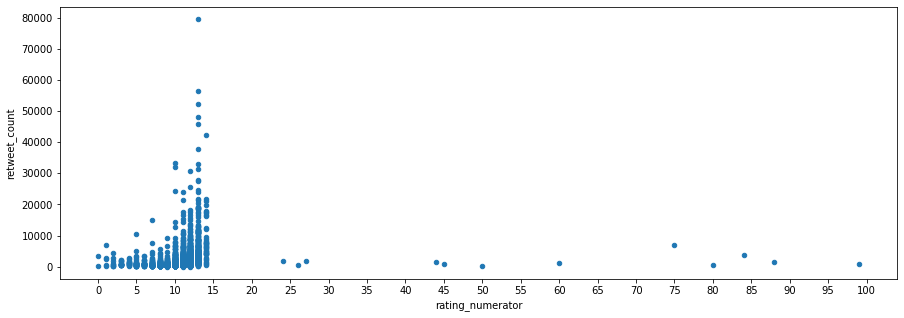

In [45]:
df_master.plot(x='rating_numerator', y='retweet_count', kind='scatter', figsize=(15, 5), xticks=np.arange(0, 101, 5));

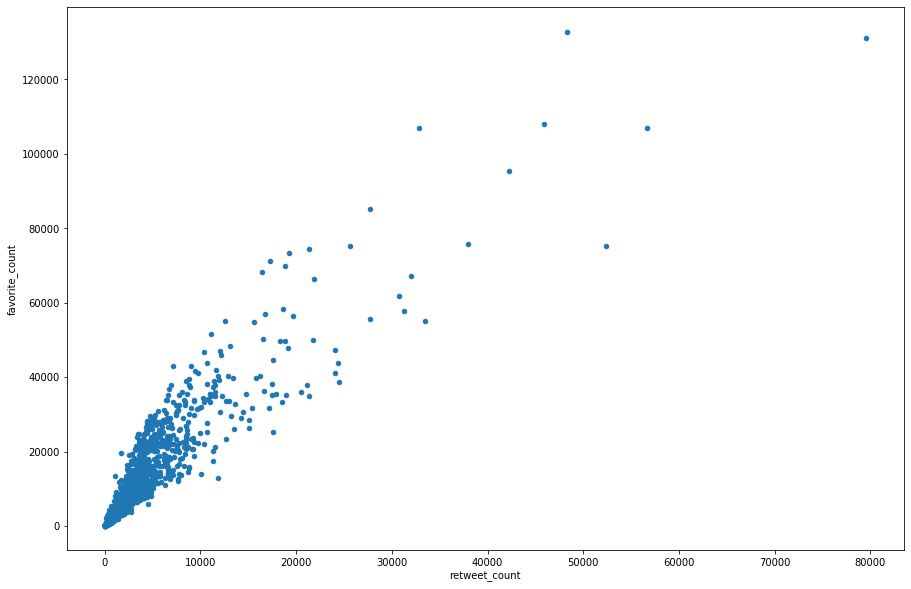

In [46]:
# Retweets and favourites correlation
df_master.plot(x='retweet_count', y='favorite_count', kind='scatter', figsize=(15, 10));

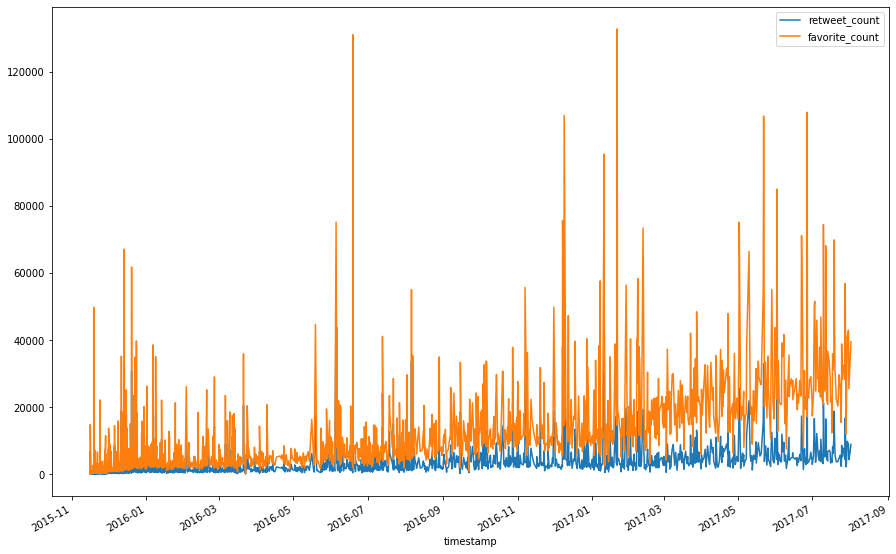

In [47]:
# Retweets and favourites over time
df_master.plot(x='timestamp', y=['retweet_count', 'favorite_count'], figsize=(15, 10));

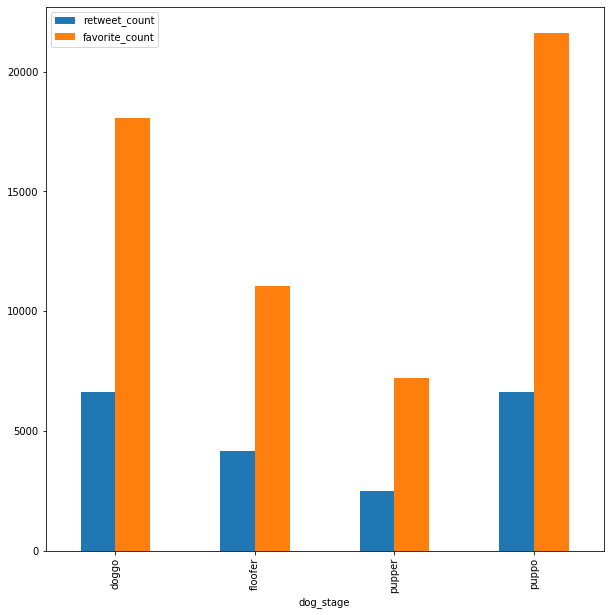

In [48]:
stage_mean_values = df_master.groupby('dog_stage')[['retweet_count', 'favorite_count']].mean()
stage_mean_values.plot.bar(figsize=(10, 10), legend=True);

The values for the first graph represent the cleaned values, as the original values included outliers with rating numerators over 1000 and invalid denominators.

The mean number of retweets for dogs in each state is also dependent on that information being saved. Relatively few tweets actually had this information, for the majority of them the dog type could no be extracted, so this bar chart only represents a small portion of the tweets.